# NYC Crimes severity prediction

## Import libraries

In [4]:
# Import numpy, pandas, matpltlib.pyplot, sklearn modules and seaborn
import numpy as np
import pandas as pd
import joblib
import re
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
plt.style.use('ggplot')

# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
# Import LightGBM Classifier
import lightgbm as lgbm
# Import XGBoost Classifier
from xgboost import XGBClassifier


from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

#import scikitplot as skplt

## Data selection

In [5]:
# Import the data
df = pd.read_csv('/content/ny_clean_all.csv')

<ipython-input-5-b530372519a1>:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/ny_clean_all.csv')


In [6]:
df.head(20)

,CMPLNT_NUM,year,month,day,weekday,hour,Latitude,Longitude,CRM_ATPT_CPTD_CD,OFNS_DESC,ADDR_PCT_CD,CRIME_CLASS,BORO_NM,PREM_TYP_DESC,IN_PARK,IN_PUBLIC_HOUSING,IN_STATION,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,10361314,2006,2,11,Saturday,16,40.689001,-73.945027,COMPLETED,ASSAULT 3 & RELATED OFFENSES,79.0,MISDEMEANOR,BROOKLYN,STREET,1,1,1,UNKNOWN,(null),(null),45-64,BLACK,F
1,10363948,2006,2,11,Saturday,17,40.698474,-73.917769,COMPLETED,HARRASSMENT 2,83.0,VIOLATION,BROOKLYN,STREET,1,1,1,18-24,BLACK,M,18-24,BLACK,F
2,16719307,2006,2,15,Wednesday,0,40.869470,-73.879861,COMPLETED,RAPE,52.0,FELONY,BRONX,(null),1,1,1,UNKNOWN,(null),(null),<18,BLACK,F
3,16939015,2006,5,30,Tuesday,19,40.837842,-73.919628,COMPLETED,RAPE,44.0,FELONY,BRONX,HOTEL/MOTEL,1,1,1,18-24,UNKNOWN,M,<18,BLACK,F
4,27139650,2006,12,15,Friday,21,40.698474,-73.917769,COMPLETED,ARSON,83.0,FELONY,BROOKLYN,OTHER,1,1,1,UNKNOWN,(null),(null),UNKNOWN,UNKNOWN,M
5,34631321,2007,8,4,Saturday,5,40.810352,-73.924942,COMPLETED,RAPE,40.0,FELONY,BRONX,RESIDENCE-HOUSE,1,1,1,25-44,BLACK,M,<18,BLACK,F
6,45954344,2008,4,24,Thursday,17,40.869470,-73.879861,COMPLETED,GRAND LARCENY,52.0,FELONY,BRONX,STREET,1,1,1,18-24,BLACK,M,18-24,BLACK,F
7,61229622,2009,4,7,Tuesday,5,40.844157,-73.900605,COMPLETED,RAPE,48.0,FELONY,BRONX,RESIDENCE-HOUSE,1,1,1,45-64,BLACK,M,25-44,BLACK,F
8,61506411,2009,5,6,Wednesday,15,40.856577,-73.843894,ATTEMPTED,ROBBERY,49.0,FELONY,BRONX,BANK,1,1,1,UNKNOWN,BLACK,M,UNKNOWN,UNKNOWN,D
9,61784892,2009,5,14,Thursday,8,40.869470,-73.879861,COMPLETED,ROBBERY,52.0,FELONY,BRONX,BANK,1,1,1,25-44,BLACK,M,UNKNOWN,UNKNOWN,D


In [7]:
# Count the number of row in each category
df['CRIME_CLASS'].value_counts()

MISDEMEANOR    19052
FELONY         11815
VIOLATION       4589
Name: CRIME_CLASS, dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35456 entries, 0 to 35455
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CMPLNT_NUM         35456 non-null  object 
 1   year               35456 non-null  int64  
 2   month              35456 non-null  int64  
 3   day                35456 non-null  int64  
 4   weekday            35456 non-null  object 
 5   hour               35456 non-null  int64  
 6   Latitude           35456 non-null  float64
 7   Longitude          35456 non-null  float64
 8   CRM_ATPT_CPTD_CD   35456 non-null  object 
 9   OFNS_DESC          35456 non-null  object 
 10  ADDR_PCT_CD        35456 non-null  float64
 11  CRIME_CLASS        35456 non-null  object 
 12  BORO_NM            35456 non-null  object 
 13  PREM_TYP_DESC      35456 non-null  object 
 14  IN_PARK            35456 non-null  int64  
 15  IN_PUBLIC_HOUSING  35456 non-null  int64  
 16  IN_STATION         354

In [9]:
# Define a utility function to reduce memory usage by convert the values types
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    return df
df = reduce_mem_usage(df)

Memory usage after optimization is: 3.99 MB
Decreased by 35.9%


## Data preparing

### Select only relevant columns


In [10]:
# Set the list of features to include in Machine Learning Model
L=['CMPLNT_NUM','year','CRM_ATPT_CPTD_CD','SUSP_AGE_GROUP','SUSP_RACE','SUSP_SEX']
df_sel=df.drop(columns=L)

In [11]:
df_sel.head()

,month,day,weekday,hour,Latitude,Longitude,OFNS_DESC,ADDR_PCT_CD,CRIME_CLASS,BORO_NM,PREM_TYP_DESC,IN_PARK,IN_PUBLIC_HOUSING,IN_STATION,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,2,11,Saturday,16,40.68750,-73.9375,ASSAULT 3 & RELATED OFFENSES,79.0,MISDEMEANOR,BROOKLYN,STREET,1,1,1,45-64,BLACK,F
1,2,11,Saturday,17,40.68750,-73.9375,HARRASSMENT 2,83.0,VIOLATION,BROOKLYN,STREET,1,1,1,18-24,BLACK,F
2,2,15,Wednesday,0,40.87500,-73.8750,RAPE,52.0,FELONY,BRONX,(null),1,1,1,<18,BLACK,F
3,5,30,Tuesday,19,40.84375,-73.9375,RAPE,44.0,FELONY,BRONX,HOTEL/MOTEL,1,1,1,<18,BLACK,F
4,12,15,Friday,21,40.68750,-73.9375,ARSON,83.0,FELONY,BROOKLYN,OTHER,1,1,1,UNKNOWN,UNKNOWN,M


In [12]:
df_sel = df_sel[df_sel.ne('UNKNOWN').all(axis=1)].reset_index(drop=True)
df_sel.head()
df_sel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23703 entries, 0 to 23702
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   month              23703 non-null  int8   
 1   day                23703 non-null  int8   
 2   weekday            23703 non-null  object 
 3   hour               23703 non-null  int8   
 4   Latitude           23703 non-null  float16
 5   Longitude          23703 non-null  float16
 6   OFNS_DESC          23703 non-null  object 
 7   ADDR_PCT_CD        23703 non-null  float16
 8   CRIME_CLASS        23703 non-null  object 
 9   BORO_NM            23703 non-null  object 
 10  PREM_TYP_DESC      23703 non-null  object 
 11  IN_PARK            23703 non-null  int8   
 12  IN_PUBLIC_HOUSING  23703 non-null  int8   
 13  IN_STATION         23703 non-null  int8   
 14  VIC_AGE_GROUP      23703 non-null  object 
 15  VIC_RACE           23702 non-null  object 
 16  VIC_SEX            237

In [13]:
df_sel['OFNS_DESC'].value_counts()[0:17]

HARRASSMENT 2                     4057
PETIT LARCENY                     3082
ASSAULT 3 & RELATED OFFENSES      2962
GRAND LARCENY                     2430
CRIMINAL MISCHIEF & RELATED OF    2292
OFF. AGNST PUB ORD SENSBLTY &     2155
ROBBERY                           1394
BURGLARY                           977
GRAND LARCENY OF MOTOR VEHICLE     892
FELONY ASSAULT                     886
THEFT-FRAUD                        439
SEX CRIMES                         427
MISCELLANEOUS PENAL LAW            421
VEHICLE AND TRAFFIC LAWS           231
FRAUDS                             165
RAPE                               161
(null)                             137
Name: OFNS_DESC, dtype: int64

In [14]:
values_to_keep=['ASSAULT 3 & RELATED OFFENSES', 'HARRASSMENT 2', 'RAPE','GRAND LARCENY', 'SEX CRIMES', 'ROBBERY', 'BURGLARY','PETIT LARCENY','CRIMINAL MISCHIEF & RELATED OF','OFF. AGNST PUB ORD SENSBLTY &',
                'FELONY ASSAULT','MISCELLANEOUS PENAL LAW','GRAND LARCENY OF MOTOR VEHICLE','VEHICLE AND TRAFFIC LAWS ','OFFENSES AGAINST PUBLIC ADMINI','THEFT-FRAUD','FRAUDS']
dff = df_sel[df_sel['OFNS_DESC'].isin(values_to_keep)]


In [15]:
dff['OFNS_DESC'].value_counts()

HARRASSMENT 2                     4057
PETIT LARCENY                     3082
ASSAULT 3 & RELATED OFFENSES      2962
GRAND LARCENY                     2430
CRIMINAL MISCHIEF & RELATED OF    2292
OFF. AGNST PUB ORD SENSBLTY &     2155
ROBBERY                           1394
BURGLARY                           977
GRAND LARCENY OF MOTOR VEHICLE     892
FELONY ASSAULT                     886
THEFT-FRAUD                        439
SEX CRIMES                         427
MISCELLANEOUS PENAL LAW            421
FRAUDS                             165
RAPE                               161
OFFENSES AGAINST PUBLIC ADMINI     132
Name: OFNS_DESC, dtype: int64

In [16]:
dff.head()

,month,day,weekday,hour,Latitude,Longitude,OFNS_DESC,ADDR_PCT_CD,CRIME_CLASS,BORO_NM,PREM_TYP_DESC,IN_PARK,IN_PUBLIC_HOUSING,IN_STATION,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,2,11,Saturday,16,40.68750,-73.9375,ASSAULT 3 & RELATED OFFENSES,79.0,MISDEMEANOR,BROOKLYN,STREET,1,1,1,45-64,BLACK,F
1,2,11,Saturday,17,40.68750,-73.9375,HARRASSMENT 2,83.0,VIOLATION,BROOKLYN,STREET,1,1,1,18-24,BLACK,F
2,2,15,Wednesday,0,40.87500,-73.8750,RAPE,52.0,FELONY,BRONX,(null),1,1,1,<18,BLACK,F
3,5,30,Tuesday,19,40.84375,-73.9375,RAPE,44.0,FELONY,BRONX,HOTEL/MOTEL,1,1,1,<18,BLACK,F
4,8,4,Saturday,5,40.81250,-73.9375,RAPE,40.0,FELONY,BRONX,RESIDENCE-HOUSE,1,1,1,<18,BLACK,F


### Deal with categorical data: pd.get_dummies()

### Split the data into train and test

In [17]:
from sklearn.preprocessing import LabelEncoder

def encode_categorical_columns(df):
    label_encoder = LabelEncoder()
    for column in df.columns:
        if df[column].dtype == 'object':  # Check if the column is categorical
            df[column + '_encoded'] = label_encoder.fit_transform(df[column])
    return df

df_encoded = encode_categorical_columns(dff)
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22872 entries, 0 to 23702
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   month                  22872 non-null  int8   
 1   day                    22872 non-null  int8   
 2   weekday                22872 non-null  object 
 3   hour                   22872 non-null  int8   
 4   Latitude               22872 non-null  float16
 5   Longitude              22872 non-null  float16
 6   OFNS_DESC              22872 non-null  object 
 7   ADDR_PCT_CD            22872 non-null  float16
 8   CRIME_CLASS            22872 non-null  object 
 9   BORO_NM                22872 non-null  object 
 10  PREM_TYP_DESC          22872 non-null  object 
 11  IN_PARK                22872 non-null  int8   
 12  IN_PUBLIC_HOUSING      22872 non-null  int8   
 13  IN_STATION             22872 non-null  int8   
 14  VIC_AGE_GROUP          22872 non-null  object 
 15  VI

<ipython-input-17-709c6a20d090>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column + '_encoded'] = label_encoder.fit_transform(df[column])
<ipython-input-17-709c6a20d090>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column + '_encoded'] = label_encoder.fit_transform(df[column])
<ipython-input-17-709c6a20d090>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

In [18]:
L=['VIC_AGE_GROUP','VIC_RACE','VIC_SEX','weekday','OFNS_DESC','CRIME_CLASS','BORO_NM','PREM_TYP_DESC']
df_encoded.drop(columns=L,inplace=True)

<ipython-input-18-5f43dee9bfbc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_encoded.drop(columns=L,inplace=True)


In [19]:
y= df_encoded['CRIME_CLASS_encoded']
X = df_encoded.drop(columns=['OFNS_DESC_encoded','CRIME_CLASS_encoded'], axis=1)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,shuffle=True, random_state=21, stratify=y)

## Utils

In [21]:
def plot_cm(y_pred,y_test,algorithm,figure_name):
    mat_RF = confusion_matrix(y_pred,y_test)
    plt.figure(figsize=(16,4))
    sns.heatmap(mat_RF, square=True, annot=True, fmt='d', cbar=False,xticklabels=[0,1,2],yticklabels=[0,1,2])
    plt.xlabel('True labels')
    plt.ylabel('predicted labels')
    plt.title(algorithm)
    plt.savefig(figure_name)

In [22]:
def plot_roc(y_test, model, figure_name):
    pl = skplt.metrics.plot_roc(y_test, model.predict_proba(X_test), figsize=(12,6))
    plt.show()
    pl.figure.savefig(figure_name)

In [23]:
def save_model(model, model_name,is_tree=False):
    joblib.dump(model.estimators_[0] if is_tree else model,f'{model_name}.joblib')
    print(f"Model size: {np.round(os.path.getsize(f'{model_name}.joblib') / 1024 / 1024, 2) } MB")

## Modeling: Random Forest

In [24]:
clf=RandomForestClassifier(n_estimators=100,verbose=1)

#Train the model using the training sets
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

# Get the accuracy score
acc_rf = accuracy_score(y_test, y_pred)

# Get classification report
class_report = classification_report(y_test, y_pred)

# Model Accuracy, how often is the classifier correct?
print("[Random forest algorithm] accuracy_score: {:.3f}.".format(acc_rf))

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.2s


[Random forest algorithm] accuracy_score: 0.480.


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s


In [25]:
print(class_report)

              precision    recall  f1-score   support

           0       0.46      0.44      0.45      1606
           1       0.51      0.65      0.57      2157
           2       0.29      0.11      0.16       812

    accuracy                           0.48      4575
   macro avg       0.42      0.40      0.39      4575
weighted avg       0.45      0.48      0.46      4575



In [26]:
# Save model
save_model(clf,"random_forest",True)

Model size: 1.12 MB


## Modeling: LightGBM

In [27]:
# Define the model hyperparameters
lgbm_params = {
          "boosting_type": "gbdt",
          "learning_rate": 0.1,
          "num_leaves": 20,
          "max_bin": 256,
          "verbosity": 1,
          "drop_rate": 0.1,
          "is_unbalance": False,
          "max_drop": 50,
          "min_child_samples": 20,
          "min_child_weight": 150,
          "min_split_gain": 0,
          "subsample": 0.9}
# Train the model
lbm_clf = lgbm.LGBMClassifier(**lgbm_params)
lbm_clf.fit(X_train,y_train)
# Evaluate the model
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)

# Get classification report
class_report = classification_report(y_test, y_pred)

print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001173 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 18297, number of used features: 12
[LightGBM] [Info] Start training from score -1.047008
[LightGBM] [Info] Start training from score -0.752072
[LightGBM] [Info] Start training from score -1.728082
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s


In [28]:
print(class_report)

              precision    recall  f1-score   support

           0       0.46      0.44      0.45      1606
           1       0.51      0.65      0.57      2157
           2       0.29      0.11      0.16       812

    accuracy                           0.48      4575
   macro avg       0.42      0.40      0.39      4575
weighted avg       0.45      0.48      0.46      4575



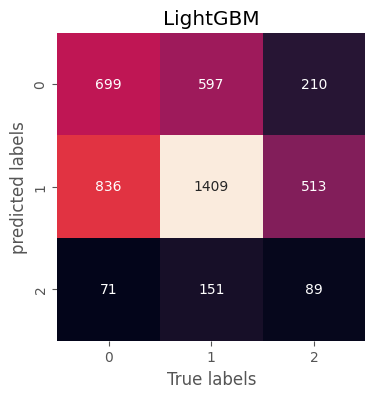

In [29]:
# Plot the confusion matrix
plot_cm(y_pred, y_test, "LightGBM", 'cm_LightGBM.pdf')

In [34]:
# Save the model
save_model(lbm_clf, "lightgbm")

Model size: 0.65 MB


## Modeling XGBoost

In [35]:
# Before training the model, we need to remove some special characters from the columns name
regex = re.compile(r"\[|\]|<", re.IGNORECASE)
X_train.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_train.columns.values]

In [36]:
# Define the model hyperparameters
params = {
            'objective':'multi:softmax',
            'max_depth': 10,
            'alpha': 10,
            'learning_rate': 0.1,
            'n_estimators':100,
            'use_label_encoder':False
        }

# instantiate the classifier
xgb_clf = XGBClassifier(**params)

# fit the classifier to the training data
xgb_clf.fit(X_train, y_train)

# test the models performace
y_pred = xgb_clf.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
print('XGBBoost Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

XGBBoost Model accuracy score: 0.4920


In [37]:
# Get classification report
class_report = classification_report(y_test, y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.48      0.41      0.44      1606
           1       0.51      0.73      0.60      2157
           2       0.22      0.04      0.06       812

    accuracy                           0.49      4575
   macro avg       0.40      0.39      0.37      4575
weighted avg       0.45      0.49      0.45      4575



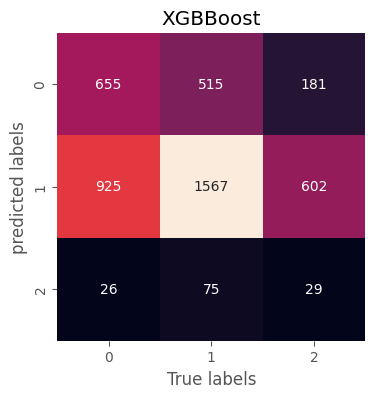

In [38]:
# Plot the confusion matrix
plot_cm(y_pred, y_test, "XGBBoost", 'cm_XGBBoost.pdf')

In [40]:
# Save the model
save_model(xgb_clf, "xgboost")

Model size: 2.39 MB
